### Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline




In [2]:
# Loading the dataset
df = pd.read_csv(r"D:\Lux Academy\Week 1\archive\1. Weather Data.csv")
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


### 1.Data Overview and Cleaning

##### What are the key characteristics of the dataset? (e.g., number of records, features, data types)

In [3]:
row,col = df.shape
print(f"The number of rows is {row} while the number of columns is {col} in the dataset")
print('-----------------------------------------------------------------------------------')
print("\nThe data types of the dataset is below\n")
df.info()

The number of rows is 8784 while the number of columns is 8 in the dataset
-----------------------------------------------------------------------------------

The data types of the dataset is below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


#### Identifying and handling of missing values

In [4]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

#### Checking of duplicated values

In [5]:
df.duplicated().sum()

0

### 2. Statistical Summary

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


### 2. Statistical Summary

In [6]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


#### Identifying and describing any significant outliers in the data.

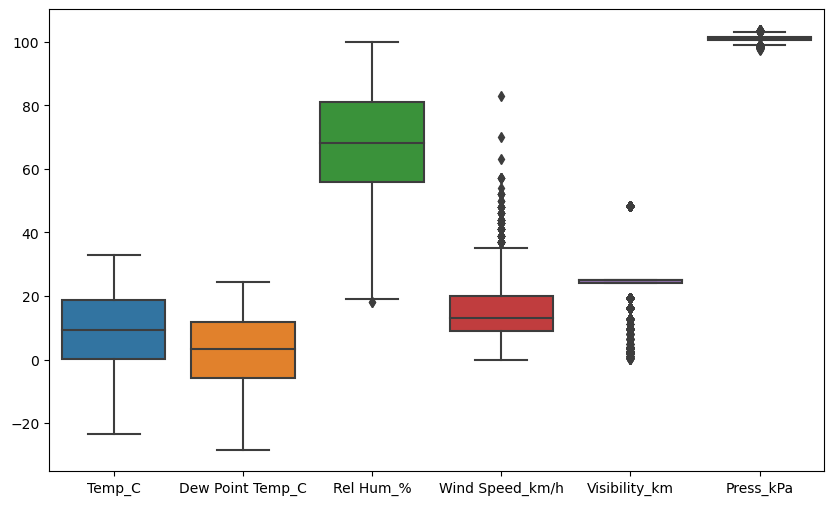

In [7]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df.select_dtypes(include = ['float64', 'int64']))
plt.show()

### 3.Data Visualization

##### Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).

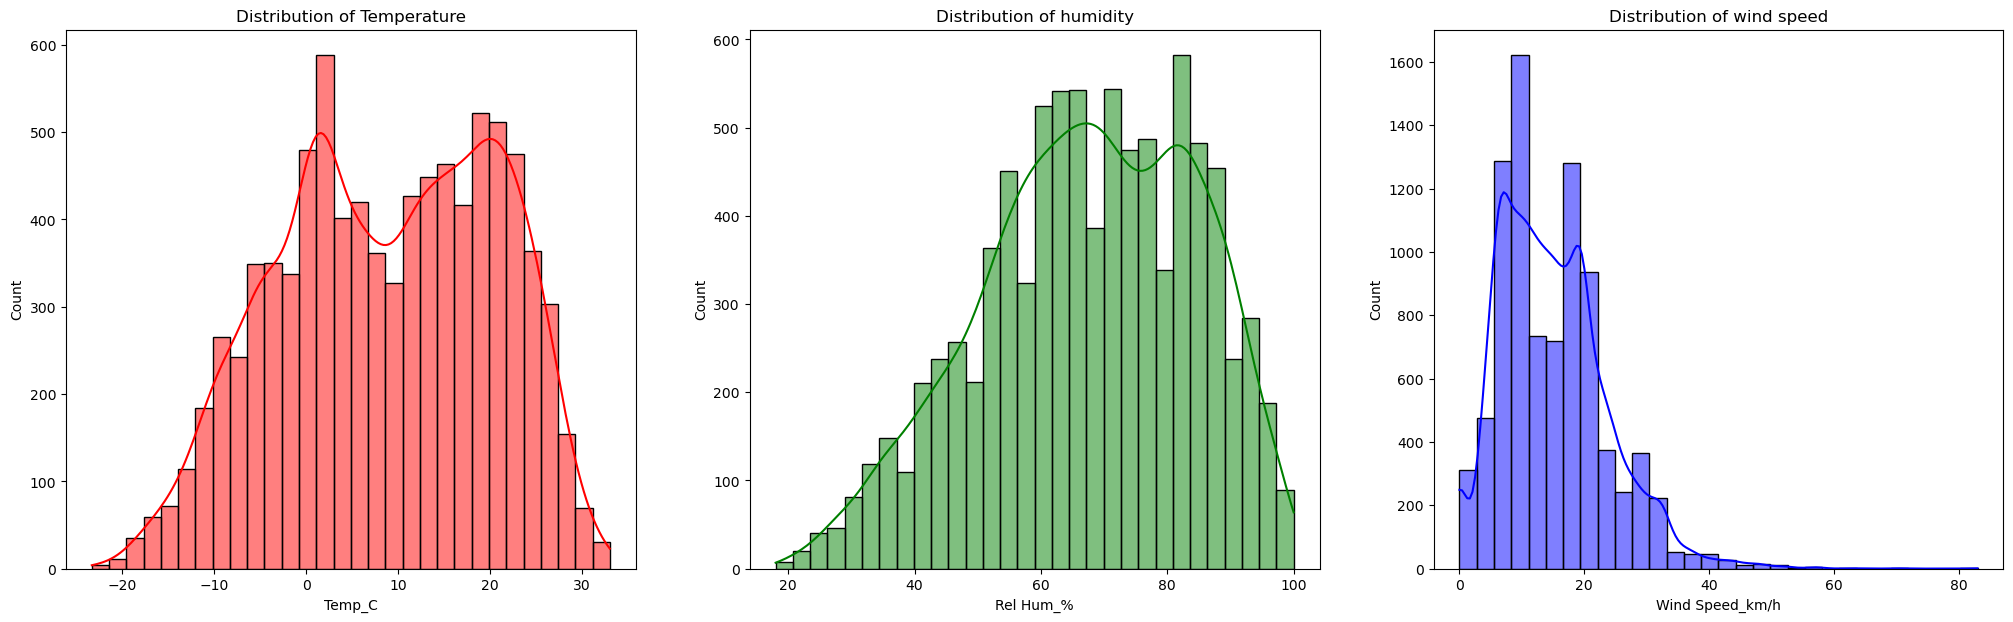

In [8]:
fig, axs = plt.subplots(1, 3, figsize = (25, 7))

sns.histplot(data = df, x = 'Temp_C', bins = 30, kde = True, color = 'r', ax = axs[0])
axs[0].set_title('Distribution of Temperature')

sns.histplot(data = df, x = 'Rel Hum_%', bins = 30, kde = True, color = 'g', ax = axs[1])
axs[1].set_title('Distribution of humidity')

sns.histplot(data = df, x = 'Wind Speed_km/h', bins = 30, kde = True, color = 'b',ax = axs[2])
axs[2].set_title('Distribution of wind speed')
plt.show()

##### Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.

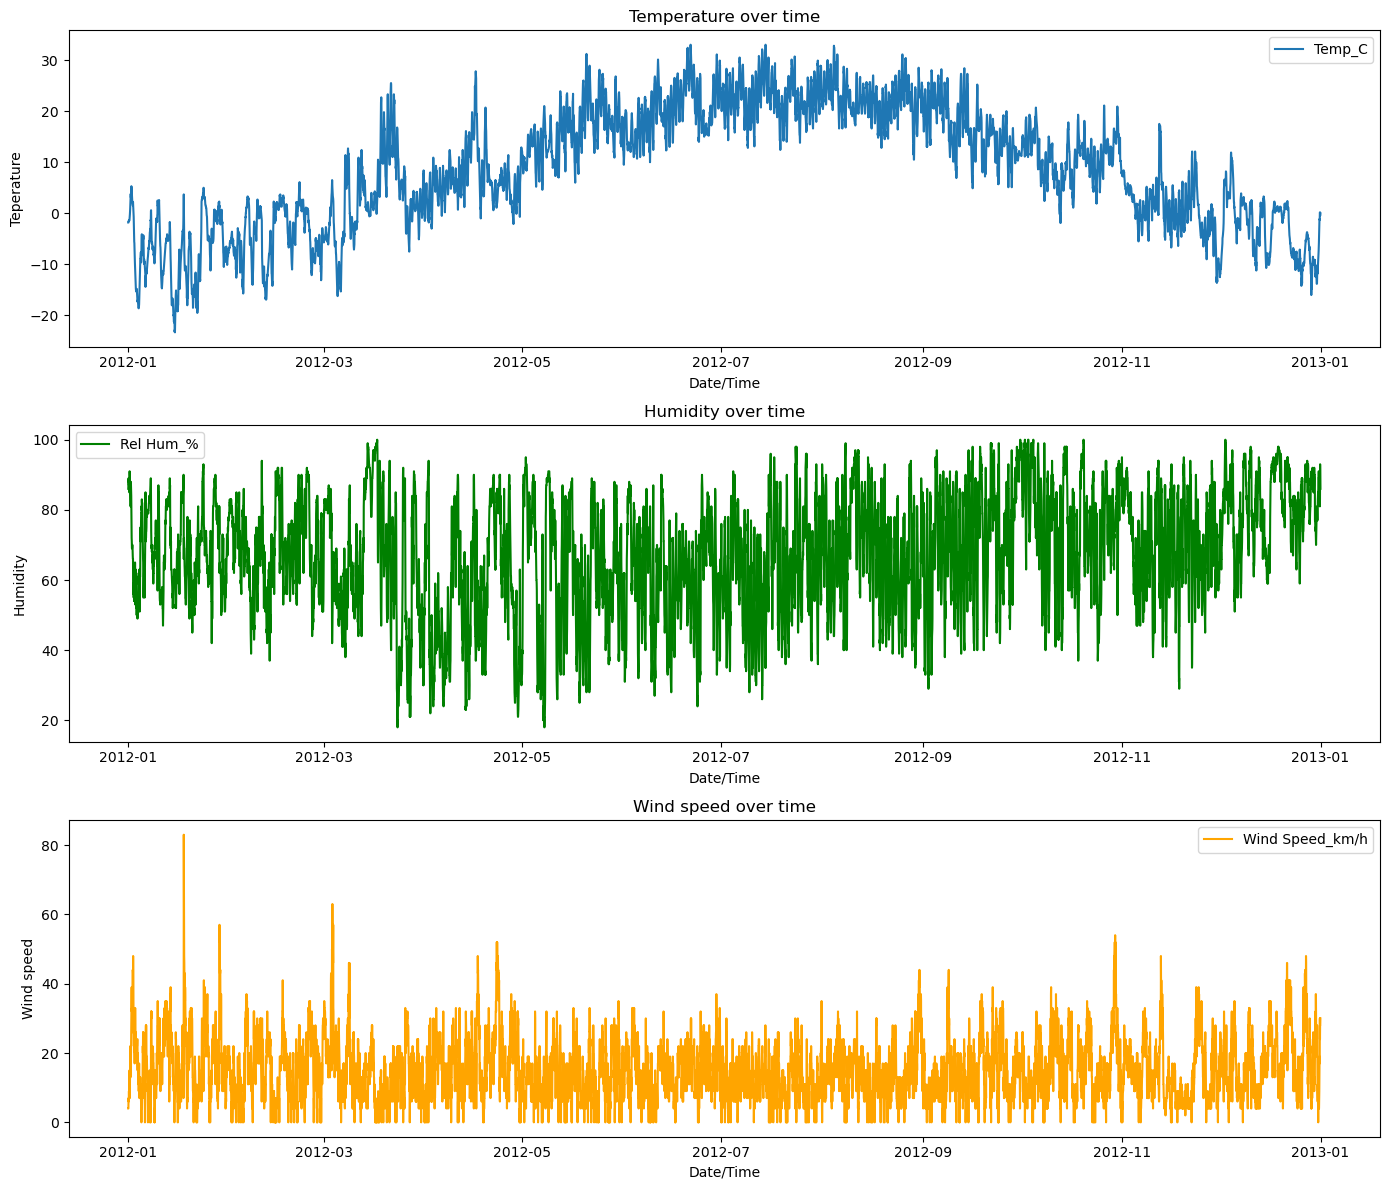

In [9]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

plt.figure(figsize = (14,12))

plt.subplot(3, 1, 1)
plt.plot(df['Date/Time'], df['Temp_C'], label = 'Temp_C')
plt.title('Temperature over time')
plt.xlabel('Date/Time')
plt.ylabel('Teperature')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Date/Time'], df['Rel Hum_%'], label = 'Rel Hum_%', color = 'green')
plt.title('Humidity over time')
plt.xlabel('Date/Time')
plt.ylabel('Humidity')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['Date/Time'], df['Wind Speed_km/h'], label = 'Wind Speed_km/h', color = 'orange' )
plt.title('Wind speed over time')
plt.xlabel('Date/Time')
plt.ylabel('Wind speed')
plt.legend()

plt.tight_layout()
plt.show()

#### Create correlation matrices and heatmaps to identify relationships between different weather parameters.

In [10]:
def plot_correlation_heatmap(df):
    """
    This function takes a DataFrame and plots a correlation matrix heatmap
    to identify relationships between different weather parameters.
    
    Parameters:
    df (DataFrame): The input DataFrame containing weather data.
    
    Returns:
    None
    """
    # Identify non-numeric columns
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    print("Non-numeric columns:", non_numeric_columns)

    # Option 1: Remove non-numeric columns
    df_numeric = df.drop(columns=non_numeric_columns)

    # Option 2: Convert non-numeric columns to numeric (if applicable)
    # Example: Convert 'Fog' to a binary indicator (0 or 1)
    if 'Fog' in df.columns:
        df['Fog'] = df['Fog'].apply(lambda x: 1 if x == 'Fog' else 0)

    # Calculate the correlation matrix
    corr_matrix = df_numeric.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    
    # Add titles and labels
    plt.title('Correlation Matrix Heatmap')
    plt.show()    

Non-numeric columns: Index(['Weather'], dtype='object')


C:\Users\AMON TOT\AppData\Local\Temp\ipykernel_14360\913703328.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_numeric.corr()


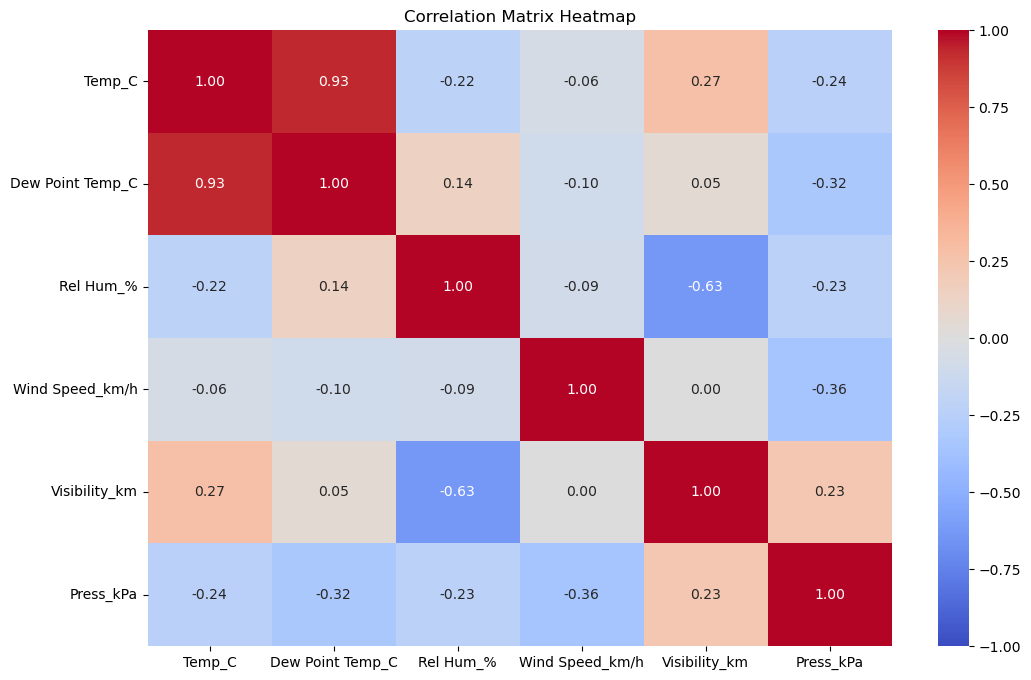

In [11]:
plot_correlation_heatmap(df)

### 4.Weather Patterns and trends

##### Analyze and describe any trends or patterns you observe in the data. For instance, how do temperature and humidity vary across different seasons or months?

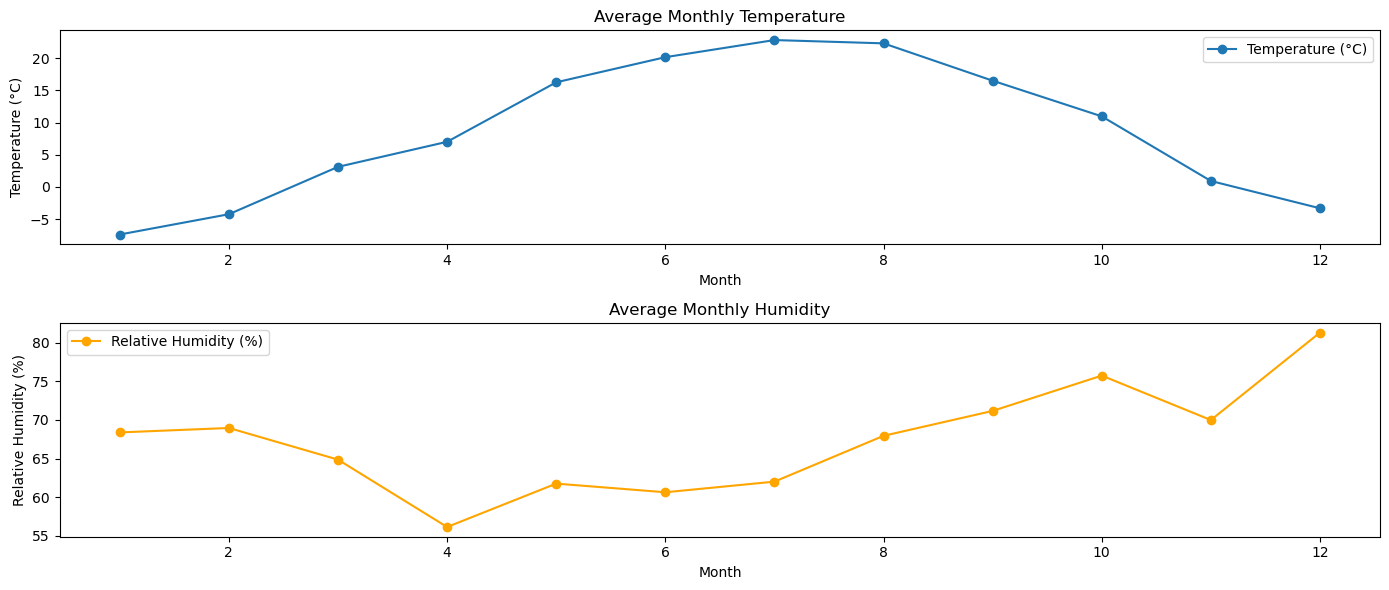

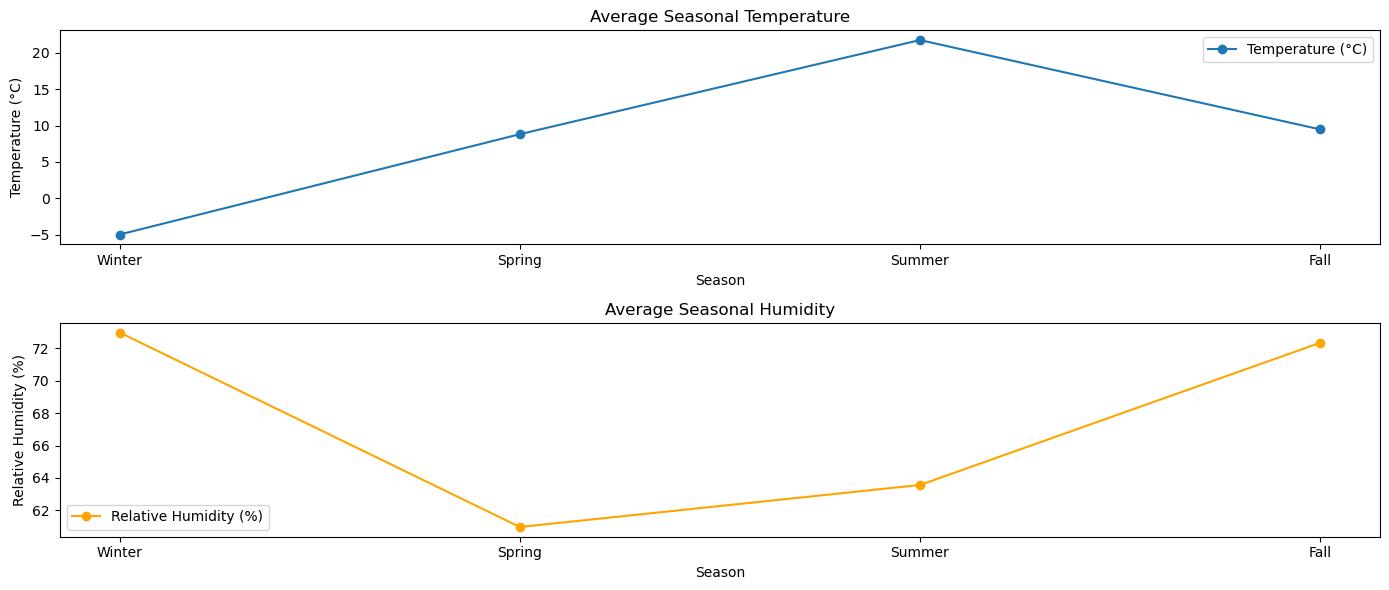

In [12]:
# Reset the index to make 'Date/Time' a column
df.reset_index(inplace=True)

# Convert 'Date/Time' column to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract month and season
df['Month'] = df['Date/Time'].dt.month
df['Season'] = df['Date/Time'].dt.month % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall

# Exclude non-numeric columns for aggregation
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate monthly averages
monthly_avg = df.groupby('Month')[numeric_columns].mean()

# Calculate seasonal averages
seasonal_avg = df.groupby('Season')[numeric_columns].mean()

# Plot monthly temperature and humidity
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(monthly_avg.index, monthly_avg['Temp_C'], marker='o', label='Temperature (°C)')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(monthly_avg.index, monthly_avg['Rel Hum_%'], marker='o', label='Relative Humidity (%)', color='orange')
plt.title('Average Monthly Humidity')
plt.xlabel('Month')
plt.ylabel('Relative Humidity (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot seasonal temperature and humidity
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(seasonal_avg.index, seasonal_avg['Temp_C'], marker='o', label='Temperature (°C)')
plt.title('Average Seasonal Temperature')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(seasonal_avg.index, seasonal_avg['Rel Hum_%'], marker='o', label='Relative Humidity (%)', color='orange')
plt.title('Average Seasonal Humidity')
plt.xlabel('Season')
plt.ylabel('Relative Humidity (%)')
plt.xticks([1, 2, 3, 4], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.legend()

plt.tight_layout()
plt.show()

##### Investigate any anomalies or unusual patterns in the data. What might be the reasons for these anomalies?

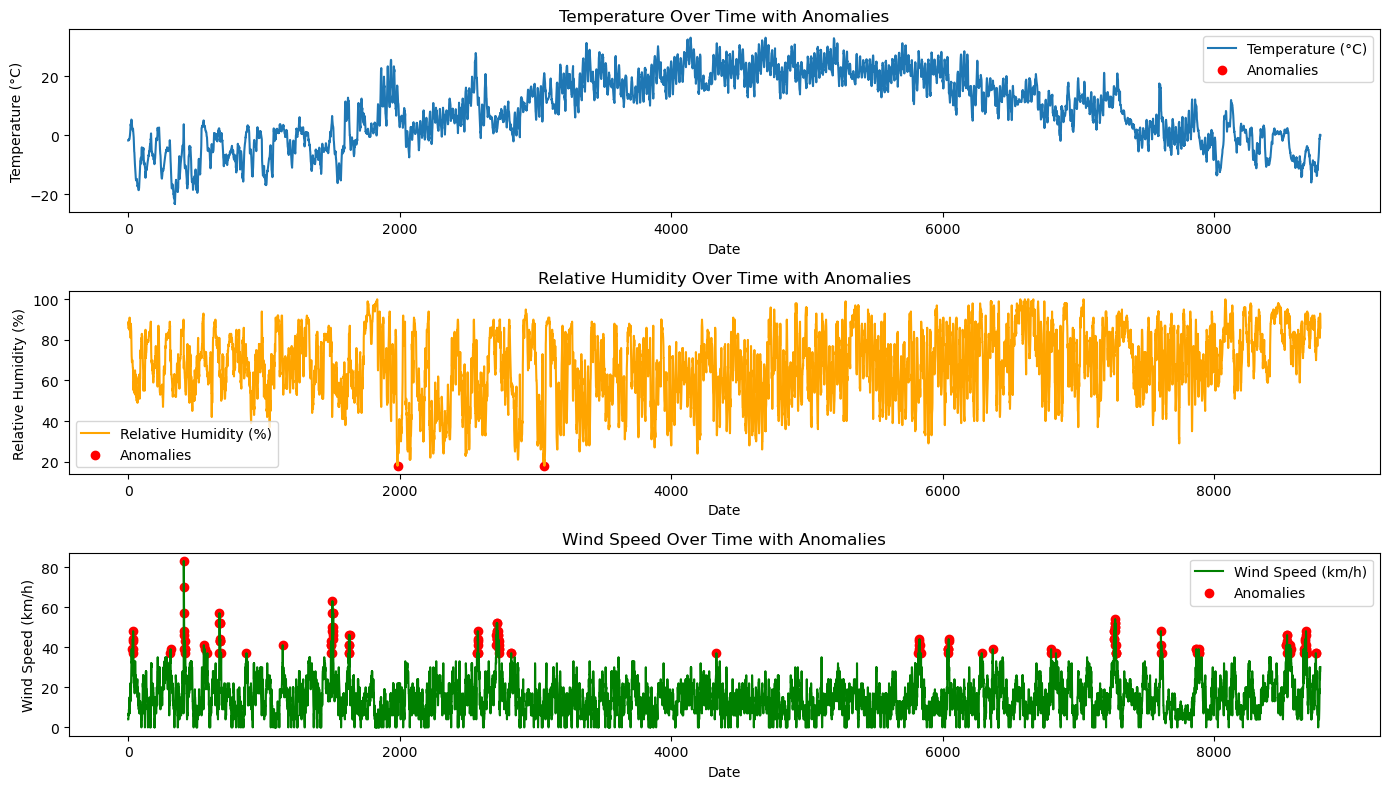

In [13]:
# Set 'Date/Time' as the index
#df.set_index('Date/Time', inplace=True)

# Detect anomalies using the IQR method
def detect_anomalies(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Identify anomalies in temperature, humidity, and wind speed
temp_anomalies = detect_anomalies(df['Temp_C'])
humidity_anomalies = detect_anomalies(df['Rel Hum_%'])
wind_speed_anomalies = detect_anomalies(df['Wind Speed_km/h'])

# Plot anomalies
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Temp_C'], label='Temperature (°C)')
plt.scatter(temp_anomalies.index, temp_anomalies, color='red', label='Anomalies')
plt.title('Temperature Over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df.index, df['Rel Hum_%'], label='Relative Humidity (%)', color='orange')
plt.scatter(humidity_anomalies.index, humidity_anomalies, color='red', label='Anomalies')
plt.title('Relative Humidity Over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df.index, df['Wind Speed_km/h'], label='Wind Speed (km/h)', color='green')
plt.scatter(wind_speed_anomalies.index, wind_speed_anomalies, color='red', label='Anomalies')
plt.title('Wind Speed Over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()

plt.tight_layout()
plt.show()

### Insights and conclusion
#### Key Insights
##### 1.Seasonal temperature variation
* **Summer**-Higher average temperatures, peaking around mid-year.
* **Winter**-Lower average temperatures, with noticeable dips in the colder months.
* **Suprising finding**-Occasional temperature spikes in winter, possibly indicating unusual weather events.
##### 2.Humidity trends
* **Inverse Relationship**-As temperatures rise, relative humidity tends to decrease, and vice versa.
* **Seasonal Patterns**-Higher humidity levels in winter and lower in summer, consistent with temperature trends.
##### 3.Wind Speed Anomalies
* **Seasonal Variations**-Higher wind speeds observed in certain months, possibly due to seasonal weather patterns.
* **Anomalies**-Sudden spikes in wind speed, which could be linked to specific weather events like storms.
#### Practical Applications
##### Weather Prediction
* **Seasonal Forecasting**-Understanding seasonal trends helps in predicting temperature and humidity changes throughout the year.
* **Anomaly Detection**-Identifying unusual patterns can improve the accuracy of weather models by accounting for extreme events.
##### Agricultural Planning
* **Crop Management**-Farmers can use temperature and humidity trends to plan planting and harvesting schedules.
* **Pest Control**-Predicting weather patterns helps in anticipating pest outbreaks and taking preventive measures.
##### Public Safety
* **Extreme Weather Alerts**-Detecting anomalies in wind speed and temperature can aid in issuing timely warnings for storms or heatwaves.
* **Infrastructure Planning**-Insights into weather patterns can guide the design and maintenance of infrastructure to withstand extreme conditions.